In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv('C:/Users/John/Documents/ml_projects/tripadvisor_reviews/data/tripadvisor_hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [50]:
data.shape

(20491, 2)

Check out the distribution of ratings in the dataset

Text(0.5, 1.0, 'Distribution of Ratings')

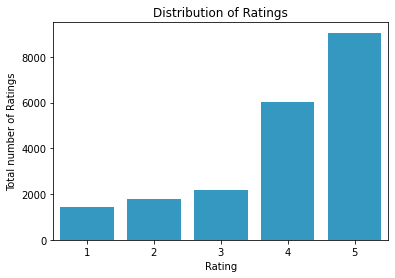

In [51]:
sns.countplot(x=data['Rating'], palette=['#1da2d8'])
plt.ylabel('Total number of Ratings')
plt.title('Distribution of Ratings')

Overwhelmingly positive ratings compared to negative ratings. 

Lets dive deep into checking out the common words within each Rating to see how our model would predict if a rating was positive, negative or neutral.

Begin by cleaning up the text and proceeding to stemming each word

In [52]:
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

In [53]:
# Remove any digits in the sentences, ensure the start of each sentence is an alphanumeric characterm lowercased every word and removed any words of 2 characters or less
def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    token_list = [word for word in tokens if word not in stop_words]
    token_list = [word for word in tokens if len(word) > 2]
    new_text = ' '.join(token_list)
    return new_text

In [54]:
data['cleaned_text'] = data['Review'].apply(clean_text)
data.head()

,Review,Rating,cleaned_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,nothing special charge diamond member hilton d...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattle...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [55]:
from nltk.stem import SnowballStemmer

In [56]:
stem_sentences = []
stemmer = SnowballStemmer(language='english')
for review in data['cleaned_text']:
    review_lem = word_tokenize(review)
    review_lem = ' '.join([stemmer.stem(w) for w in review_lem])
    stem_sentences.append(review_lem)

In [69]:
data['stemmed_review'] = stem_sentences
data.head()

# Save the new dataframe into a new csv for future model creation
data.to_csv('C:/Users/John/Documents/ml_projects/tripadvisor_reviews/data/tripadvisor_hotel_cleaned_reviews.csv', index=False)

Check out the most common words in a wordcloud and compare with the stemmed reviews

In [58]:
from wordcloud import WordCloud

def get_words(data, stemmed=False):
    all_words = []
    if stemmed:
        for row in data['stemmed_review']:
            for word in row.split():
                all_words.append(word)
    else:
        for row in data['cleaned_text']:
            for word in row.split():
                all_words.append(word)
    return all_words

all_words = get_words(data, stemmed=False)
all_stemmed_words = get_words(data, stemmed=True)


In [59]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(all_words))
wordcloud_stem = WordCloud(width=800, height=800, background_color='white').generate(' '.join(all_stemmed_words))

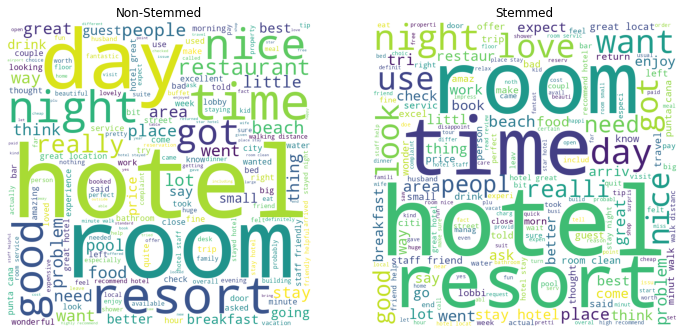

In [60]:
fig = plt.figure(figsize=(12,12))

fig1 = fig.add_subplot(1,2,1)
plt.axis('off')
fig1 = plt.imshow(wordcloud)
plt.title('Non-Stemmed')

fig2 = fig.add_subplot(1,2,2)
plt.axis('off')
fig2 = plt.imshow(wordcloud_stem)
plt.title('Stemmed')

plt.show()

From a general look, it seems that the biggest words that are commonly used between the two are:

Room, time, hotel, resort, nice, day and night

Check the most popular words in a graph

In [61]:
# Create a dictionary of words and their associated number count seen in the corpus
def create_word_dic(words):
    word_dic = {}
    for word in words:
        if word not in word_dic:
            word_dic[word] = 1
        else:
            word_dic[word] += 1
    return word_dic

word_dic = create_word_dic(all_words)

In [62]:
# Create an inverse dictionary to sort the dictionary and retrieve the corresponding words
def num_to_word_dic(dict):
    num_to_word_dict = {}
    for word in dict:
        num_to_word_dict[dict[word]] = word
    return num_to_word_dict

num_to_word_dict = num_to_word_dic(word_dic)

In [63]:
# Lets take the top 10 words seen in the corpus
def top_ten_words(dict):
    top_ten_words_num = sorted(dict, reverse=True)[:10]
    top_ten_words_num
    top_ten_words = [dict[num] for num in top_ten_words_num]
    return top_ten_words, top_ten_words_num

top_ten_all_words, top_ten_all_words_num = top_ten_words(num_to_word_dict)

Text(0.5, 1.0, 'Top Ten Words in All of the Text')

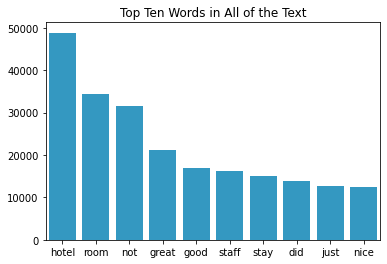

In [64]:
sns.barplot(x=top_ten_all_words, y=top_ten_all_words_num, palette = ['#1da2d8'])
plt.title('Top Ten Words in All of the Text')

Lets take a look into each rating and see what the most popular words in their respective ratings

In [65]:
def get_words(data, stemmed=False):
    all_words = []
    if stemmed == True:
        for row in data['stemmed_review']:
            for word in row.split():
                all_words.append(word)
    else:
        for row in data['cleaned_text']:
            for word in row.split():
                all_words.append(word)
    return all_words

In [66]:
# One rating
rating_one = data[data['Rating'] == 1]
rating_one_words = get_words(rating_one)

# Two rating
rating_two = data[data['Rating'] == 2]
rating_two_words = get_words(rating_two)

# Three rating
rating_three = data[data['Rating'] == 3]
rating_three_words = get_words(rating_three)

# Four rating
rating_four = data[data['Rating'] == 4]
rating_four_words = get_words(rating_four)

# Five rating
rating_five = data[data['Rating'] == 5]
rating_five_words = get_words(rating_five)

In [67]:
def word_graph(data, title=None):
    rating_dic = create_word_dic(data)
    rating_num_dic = num_to_word_dic(rating_dic)
    top_ten_rating_words, top_ten_rating_words_num = top_ten_words(rating_num_dic)
    sns.barplot(x=top_ten_rating_words, y=top_ten_rating_words_num, palette = ['#1da2d8'])
    plt.ylabel('Count')
    plt.title(title)


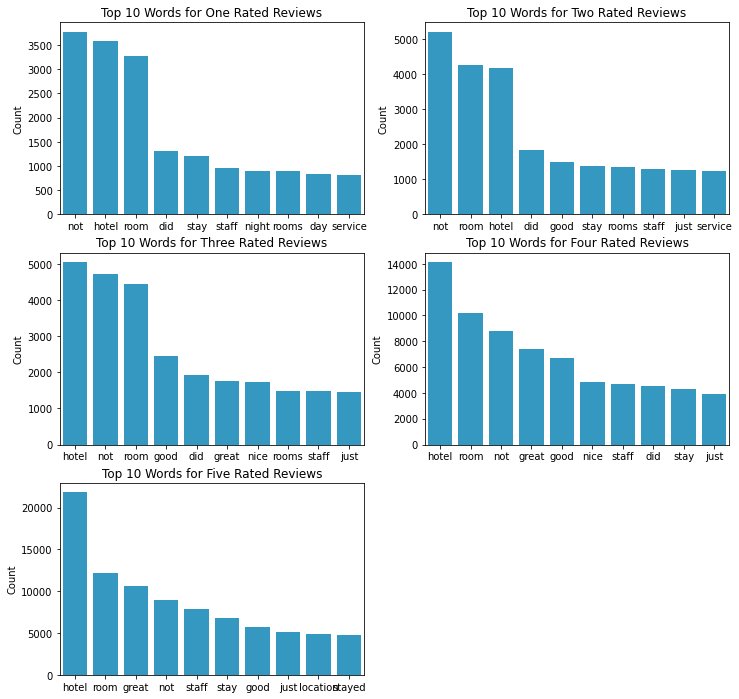

In [68]:
fig = plt.figure(figsize=(12,12))

fig1 = fig.add_subplot(3,2,1)
fig1 = word_graph(rating_one_words, title='Top 10 Words for One Rated Reviews')

fig2 = fig.add_subplot(3,2,2)
fig2 = word_graph(rating_two_words, title='Top 10 Words for Two Rated Reviews')

fig3 = fig.add_subplot(3,2,3)
fig3 = word_graph(rating_three_words, title='Top 10 Words for Three Rated Reviews')

fig4 = fig.add_subplot(3,2,4)
fig4 = word_graph(rating_four_words, title='Top 10 Words for Four Rated Reviews')

fig5 = fig.add_subplot(3,2,5)
fig5 = word_graph(rating_five_words, title='Top 10 Words for Five Rated Reviews')

plt.show()

From the looks of each graphs, it seems that the words hotel, not and room are very common words throughout any rating category. The positive words such as good, great show up for higher rated reviews more often. Just from a visual view, the graphs show that positive words will be more prominent in better reviews and negative words will be prominent in lower rated reviews. 